## Detrend and Deseasonalize a Time Series


When detrending and/or deseasonalizing a time series you may use one or a combination of approaches such as differencing, subtracting from the mean (or from a mean over a period), calculating percentage change, or using a transformation such as a log transformation. For instance, you make take first difference and then a log transformation or you may use a second difference. As you perform various operations (first difference, second difference, subtracting the mean, log transformation, percentage change), you will gain some intuition about how your data is being transformed.

You can achieve stationarity when you remove trend and seasonality.  Stationarity of a times series is when you have constant mean and variance. It also means that autocovariance does not depend on time. Your time series should be stationary before applying any analysis. 

In [1]:
import pandas as pd
import matplotlib.pylab as plot
from datetime import datetime

In [2]:
df_furniture = pd.read_csv("/Users/karenyang/Desktop/df_furniture.csv")
df_furniture.head()

,Month,furniture_price_adjusted
0,1/1/92,2073.432724
1,2/1/92,2114.485812
2,3/1/92,2260.570891
3,4/1/92,2255.103236
4,5/1/92,2331.414618


In [3]:
# Convert to datetime
from datetime import datetime
df_furniture['Month'] = pd.to_datetime(df_furniture['Month'])

In [4]:
# Set the 'Date' as index
df_furniture.set_index('Month', inplace=True)
df_furniture.head()

,furniture_price_adjusted
Month,
1992-01-01,2073.432724
1992-02-01,2114.485812
1992-03-01,2260.570891
1992-04-01,2255.103236
1992-05-01,2331.414618


In [5]:
df_furniture.describe()

,furniture_price_adjusted
count,331.000000
mean,5975.765787
std,2092.867819
min,2073.432724
25%,4280.088499
50%,6075.405272
75%,7381.403461
max,10833.501850


## Transformation

### Log Transformation

In [6]:
import numpy as np
df_furniture['furniture_log'] = np.log(df_furniture['furniture_price_adjusted'])
df_furniture.head()

,furniture_price_adjusted,furniture_log
Month,,
1992-01-01,2073.432724,7.636961
1992-02-01,2114.485812,7.656567
1992-03-01,2260.570891,7.723373
1992-04-01,2255.103236,7.720951
1992-05-01,2331.414618,7.754230


In [7]:
df_furniture['furniture_log'].describe()

count    331.000000
mean       8.623858
std        0.397684
min        7.636961
25%        8.361728
50%        8.712004
75%        8.906717
max        9.290399
Name: furniture_log, dtype: float64

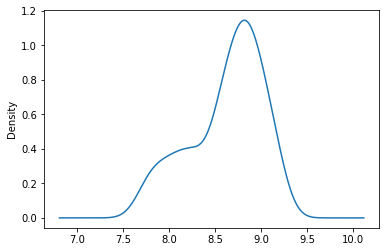

In [8]:
df_furniture['furniture_log'].plot(kind='kde')

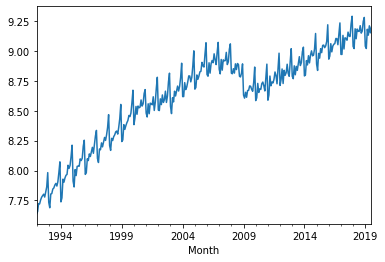

In [9]:
df_furniture['furniture_log'].plot()

In [10]:
df_furniture.head()

,furniture_price_adjusted,furniture_log
Month,,
1992-01-01,2073.432724,7.636961
1992-02-01,2114.485812,7.656567
1992-03-01,2260.570891,7.723373
1992-04-01,2255.103236,7.720951
1992-05-01,2331.414618,7.754230


## Differencing

### First Differencing 

Differencing can help to reduce trend and seasonality. You can difference your data by subtraction.  You subtract away the previous period from the current period.  Below you will see that the first observation has a NaN because there was no previous period.

In [11]:
# Take first difference
df_furniture['furniture_diff'] = df_furniture['furniture_price_adjusted'].diff()

# Remove the first data point
df_furniture.dropna(inplace=True)

# Take a look at the head of the dataset
df_furniture.head()

,furniture_price_adjusted,furniture_log,furniture_diff
Month,,,
1992-02-01,2114.485812,7.656567,41.053088
1992-03-01,2260.570891,7.723373,146.085079
1992-04-01,2255.103236,7.720951,-5.467655
1992-05-01,2331.414618,7.754230,76.311382
1992-06-01,2384.638567,7.776803,53.223949


In [12]:
df_furniture['furniture_diff'].describe()

count     330.000000
mean       23.679903
std       652.649254
min     -2521.171564
25%      -163.371863
50%        98.451560
75%       392.195983
max      1487.797701
Name: furniture_diff, dtype: float64

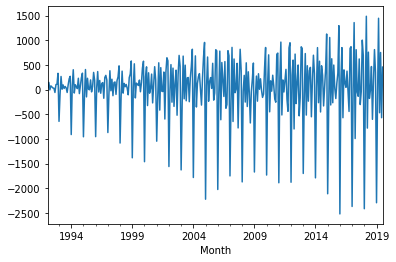

In [13]:
df_furniture['furniture_diff'].plot()

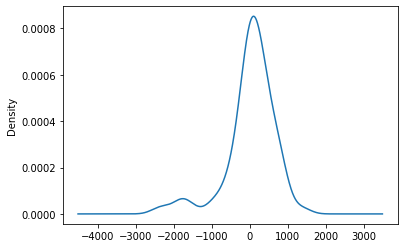

In [14]:
df_furniture['furniture_diff'].plot(kind='kde')

In [15]:
df_furniture.head()

,furniture_price_adjusted,furniture_log,furniture_diff
Month,,,
1992-02-01,2114.485812,7.656567,41.053088
1992-03-01,2260.570891,7.723373,146.085079
1992-04-01,2255.103236,7.720951,-5.467655
1992-05-01,2331.414618,7.754230,76.311382
1992-06-01,2384.638567,7.776803,53.223949


### Second Differencing


In [16]:
# Take second differencing
df_furniture['furniture_diff_second'] = df_furniture['furniture_price_adjusted'].diff(2)

# Remove the first 2 data points
df_furniture.dropna(inplace=True)

# Take a look at the head of the dataset
df_furniture.head()

,furniture_price_adjusted,furniture_log,furniture_diff,furniture_diff_second
Month,,,,
1992-04-01,2255.103236,7.720951,-5.467655,140.617424
1992-05-01,2331.414618,7.754230,76.311382,70.843727
1992-06-01,2384.638567,7.776803,53.223949,129.535331
1992-07-01,2417.165376,7.790351,32.526809,85.750758
1992-08-01,2445.498729,7.802004,28.333353,60.860162


In [17]:
df_furniture['furniture_diff_second'].describe()

count     328.000000
mean       45.561223
std       787.923712
min     -2566.558580
25%      -171.890599
50%       163.918786
75%       461.531039
max      1796.203876
Name: furniture_diff_second, dtype: float64

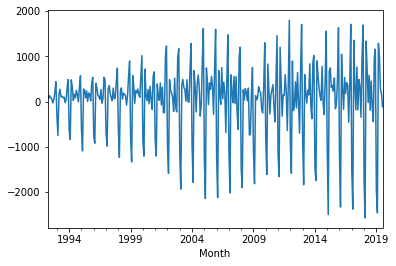

In [18]:
df_furniture['furniture_diff_second'].plot()

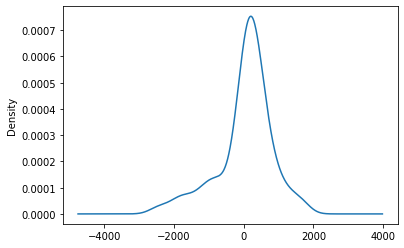

In [19]:
df_furniture['furniture_diff_second'].plot(kind='kde')

In [20]:
df_furniture.head()

,furniture_price_adjusted,furniture_log,furniture_diff,furniture_diff_second
Month,,,,
1992-04-01,2255.103236,7.720951,-5.467655,140.617424
1992-05-01,2331.414618,7.754230,76.311382,70.843727
1992-06-01,2384.638567,7.776803,53.223949,129.535331
1992-07-01,2417.165376,7.790351,32.526809,85.750758
1992-08-01,2445.498729,7.802004,28.333353,60.860162


## Percentage Change

### Percentage Change

Recall that the original unit was in millions of dollars, which is sales of furniture and home furnishings. 
One type of differencing is percentage change, which is typically applied to money units in price amounts or sales in dollars.

Between each data point, we can calculate the percentage change.  We will need to drop the first data point since it will become a Nan.

In [21]:
df_furniture['furniture_pct_change']= df_furniture['furniture_price_adjusted'].pct_change()
df_furniture.dropna(inplace=True)
df_furniture.head()

,furniture_price_adjusted,furniture_log,furniture_diff,furniture_diff_second,furniture_pct_change
Month,,,,,
1992-05-01,2331.414618,7.754230,76.311382,70.843727,0.033839
1992-06-01,2384.638567,7.776803,53.223949,129.535331,0.022829
1992-07-01,2417.165376,7.790351,32.526809,85.750758,0.013640
1992-08-01,2445.498729,7.802004,28.333353,60.860162,0.011722
1992-09-01,2387.351705,7.777940,-58.147024,-29.813671,-0.023777


In [22]:
df_furniture['furniture_pct_change'].describe()

count    327.000000
mean       0.009411
std        0.095164
min       -0.284492
25%       -0.032150
50%        0.023025
75%        0.074726
max        0.179970
Name: furniture_pct_change, dtype: float64

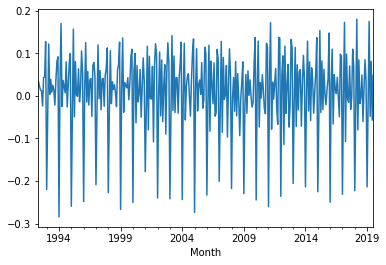

In [23]:
df_furniture['furniture_pct_change'].plot()

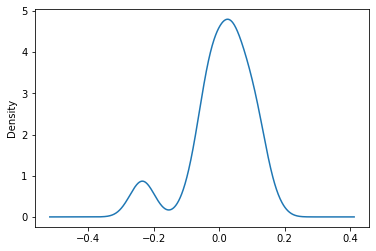

In [24]:
df_furniture['furniture_pct_change'].plot(kind='kde')

In [25]:
df_furniture.head()

,furniture_price_adjusted,furniture_log,furniture_diff,furniture_diff_second,furniture_pct_change
Month,,,,,
1992-05-01,2331.414618,7.754230,76.311382,70.843727,0.033839
1992-06-01,2384.638567,7.776803,53.223949,129.535331,0.022829
1992-07-01,2417.165376,7.790351,32.526809,85.750758,0.013640
1992-08-01,2445.498729,7.802004,28.333353,60.860162,0.011722
1992-09-01,2387.351705,7.777940,-58.147024,-29.813671,-0.023777


### Subtracting the mean

You can also subtract the mean from every data point.

In [26]:
fpa_mean = df_furniture['furniture_price_adjusted'].mean()
fpa_mean

6022.247348314986

In [27]:
df_furniture['furniture_diffmean'] = df_furniture['furniture_price_adjusted'] - fpa_mean
df_furniture.head()

,furniture_price_adjusted,furniture_log,furniture_diff,furniture_diff_second,furniture_pct_change,furniture_diffmean
Month,,,,,,
1992-05-01,2331.414618,7.754230,76.311382,70.843727,0.033839,-3690.832730
1992-06-01,2384.638567,7.776803,53.223949,129.535331,0.022829,-3637.608781
1992-07-01,2417.165376,7.790351,32.526809,85.750758,0.013640,-3605.081972
1992-08-01,2445.498729,7.802004,28.333353,60.860162,0.011722,-3576.748619
1992-09-01,2387.351705,7.777940,-58.147024,-29.813671,-0.023777,-3634.895643


In [28]:
df_furniture['furniture_diffmean'].describe()

count    3.270000e+02
mean    -2.709015e-12
std      2.062625e+03
min     -3.839109e+03
25%     -1.648349e+03
50%      1.420543e+02
75%      1.388065e+03
max      4.811255e+03
Name: furniture_diffmean, dtype: float64

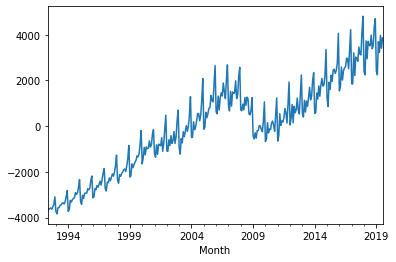

In [29]:
df_furniture['furniture_diffmean'].plot()

The trend is still increasing, which makes sense since we only shifted via subtraction of a constant value, namely the mean.

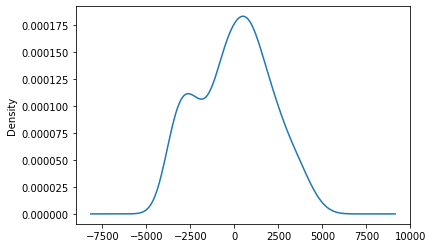

In [30]:
df_furniture['furniture_diffmean'].plot(kind='kde')

In [31]:
df_furniture.head()

,furniture_price_adjusted,furniture_log,furniture_diff,furniture_diff_second,furniture_pct_change,furniture_diffmean
Month,,,,,,
1992-05-01,2331.414618,7.754230,76.311382,70.843727,0.033839,-3690.832730
1992-06-01,2384.638567,7.776803,53.223949,129.535331,0.022829,-3637.608781
1992-07-01,2417.165376,7.790351,32.526809,85.750758,0.013640,-3605.081972
1992-08-01,2445.498729,7.802004,28.333353,60.860162,0.011722,-3576.748619
1992-09-01,2387.351705,7.777940,-58.147024,-29.813671,-0.023777,-3634.895643


### Application to a Second Dataset

Let's use a combination of approaches on the vacation dataset.

In [32]:
# Google trends on a search term "vacation" from 2004 to 2019
df_vacation = pd.read_csv("/Users/karenyang/Desktop/df_vacation.csv")
df_vacation.head()

,Month,Num_Search_Vacation
0,2004-01-01,94
1,2004-02-01,89
2,2004-03-01,86
3,2004-04-01,79
4,2004-05-01,89


In [33]:
# Convert to datetime
from datetime import datetime

df_vacation['Month'] = pd.to_datetime(df_vacation['Month'])

In [34]:
# Set the 'Date' as index
df_vacation.set_index('Month', inplace=True)
df_vacation.head()

,Num_Search_Vacation
Month,
2004-01-01,94
2004-02-01,89
2004-03-01,86
2004-04-01,79
2004-05-01,89


In [35]:
df_vacation.describe()

,Num_Search_Vacation
count,190.000000
mean,60.215789
std,15.513461
min,35.000000
25%,50.000000
50%,56.000000
75%,70.000000
max,100.000000


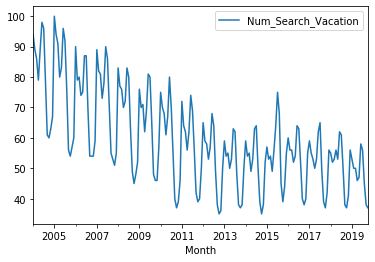

In [36]:
df_vacation.plot()

In [37]:
df_vacation['first_diff'] = df_vacation['Num_Search_Vacation'].diff()
df_vacation.dropna(inplace=True)
df_vacation.describe()

,Num_Search_Vacation,first_diff
count,189.000000,189.000000
mean,60.037037,-0.301587
std,15.357225,9.809301
min,35.000000,-23.000000
25%,50.000000,-6.000000
50%,56.000000,-1.000000
75%,70.000000,5.000000
max,100.000000,33.000000


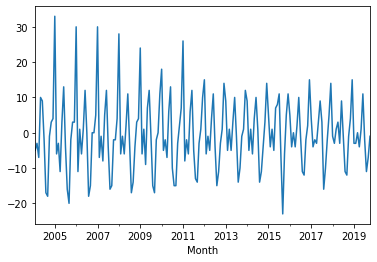

In [38]:
df_vacation['first_diff'].plot()

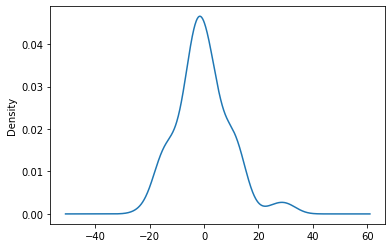

In [39]:
df_vacation['first_diff'].plot(kind='kde')

In [40]:
df_vacation['second_diff'] = df_vacation['Num_Search_Vacation'].diff(2)
df_vacation.dropna(inplace=True)
df_vacation.describe()

,Num_Search_Vacation,first_diff,second_diff
count,187.000000,187.000000,187.000000
mean,59.743316,-0.262032,-0.534759
std,15.171011,9.853813,15.500698
min,35.000000,-23.000000,-36.000000
25%,50.000000,-6.000000,-10.500000
50%,56.000000,-1.000000,-1.000000
75%,69.500000,5.000000,11.500000
max,100.000000,33.000000,37.000000


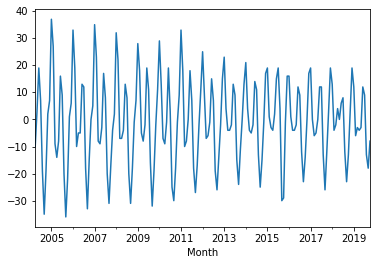

In [41]:
df_vacation['second_diff'].plot()

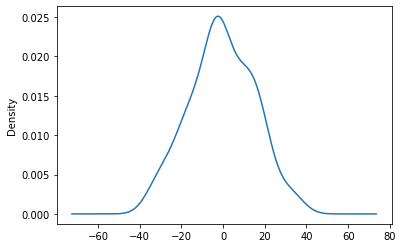

In [42]:
df_vacation['second_diff'].plot(kind='kde')

Comparing the mean and standard deviation between the first and second difference, the first difference gives better results and should be sufficient to detrend and deseasonalize the series.

In [44]:
df_vacation.head()

,Num_Search_Vacation,first_diff,second_diff
Month,,,
2004-04-01,79,-7.0,-10.0
2004-05-01,89,10.0,3.0
2004-06-01,98,9.0,19.0
2004-07-01,96,-2.0,7.0
2004-08-01,79,-17.0,-19.0


In [43]:
# the end